In [1]:
import pandas as pd
import numpy as np

a=pd.read_csv('~/Desktop/c_programs/pi_madhava.dat', names= ['0','1'] ,sep='\s+',engine='python')
a.head()
a.tail(3)            
#b = np.loadtxt('/home/juan/Desktop/c_programs/pi_madhava.dat')


,0,1
27,27,1.776357e-15
28,28,8.881784e-16
29,29,4.440892e-16


In [200]:
def dif(t,c0,c1):
    return  c0*np.exp(t*c1) 

Get a good guess values , plot the data and the function before trying the solver. Providing good guess values is the key to getting a solution.



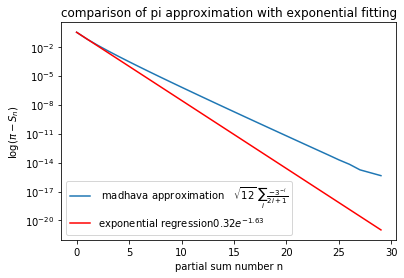

[ 0.32240463 -1.62644456]


In [210]:
guess = [0.001,-0.0001]
import matplotlib.pyplot as plt
n = len(a['0'])
y= np.empty(n)

for i in range(n) :
    y[i] = dif(a['0'][i],c[0],c[1])
    

plt.ylabel(r'$\log(\pi -S_n)$')
plt.xlabel('partial sum number n')
plt.title('comparison of pi approximation with exponential fitting')       
plt.yscale('log')
plt.plot(a["0"],a["1"],label =' madhava approximation   '+ r'$\sqrt{12}\;\sum_i \frac{-3^{-i}}{2i+1}$')
plt.plot(a['0'],y,'r',label = 'exponential regression'+r'$ %.2f e^{%.2f}$'%(c[0],c[1]))
plt.legend()
plt.savefig('/home/juan/Desktop/nonl.png', format= 'png')
plt.show()


print(c)


Fit the data using scipy.optimize.curve_fit

$f(t) = c0 +c1t +c2e^{c3t}$

Determine the values of $c_i$ that minimize the error between the model prediction and meassured values 

In [201]:
from scipy.optimize import curve_fit
# create an array from the dataframe
t = a['0'].values
f = a['1'].values
c,cov = curve_fit(dif,t,f,guess)
print(c)



[ 0.32240463 -1.62644456]


calculate $R^2$ value for the fit. Values closer to 1 are a better fit 

In [140]:
from sklearn.metrics import r2_score
print('R^2', r2_score(y,f))


R^2 0.9671377528036234


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

lin = pd.read_excel('/home/juan/Desktop/shinku3.xlsx')
lin2 = lin[['time.1','p']]
lin2.head()

,time.1,p
0,0,0.140
1,15,0.110
2,30,0.090
3,45,0.080
4,60,0.072
